In [1]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pl.read_csv("../../DATA/Advertising.csv")

In [3]:
df

TV,radio,newspaper,sales
f64,f64,f64,f64
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
…,…,…,…
38.2,3.7,13.8,7.6
94.2,4.9,8.1,9.7
177.0,9.3,6.4,12.8


In [4]:
X = df.drop('sales')

In [5]:
y = df['sales']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train, y_train)

StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
pl.DataFrame(X_train, schema=X.columns)

TV,radio,newspaper
f64,f64,f64
0.493002,-0.339942,1.615867
1.613372,1.328522,1.900792
-0.848119,-1.5879,-1.023196
0.367197,1.545558,1.288904
0.839557,-1.296257,0.873193
…,…,…
-0.581082,0.419684,-1.060563
0.563025,0.487507,0.354722
1.046066,-1.309822,0.270646


In [13]:
pl.DataFrame(X_test, schema=X.columns)

TV,radio,newspaper
f64,f64,f64
-0.913395,1.762594,0.681686
1.231211,0.23656,-1.196019
-0.460025,-0.407766,0.350051
-0.496817,1.654076,0.947927
-1.426106,0.080565,-1.350159
…,…,…
-1.751298,-0.801144,-1.186677
1.367697,1.382781,-1.219374
-1.33116,1.199657,-1.182006


In [14]:
from sklearn.linear_model import ElasticNet

In [15]:
base_elastic_model = ElasticNet()

In [16]:
param_grid = {
  'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [.1, .5, .7, .9, .95, .99, 1]
}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid_model = GridSearchCV(
    estimator=base_elastic_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=5,
    return_train_score=True
)

In [19]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             return_train_score=True, verbose=5)

In [20]:
grid_model.cv_results_

{'mean_fit_time': array([0.00230937, 0.00180416, 0.00210757, 0.00190692, 0.00150428,
        0.00100155, 0.00110445, 0.00079975, 0.00099978, 0.00120311,
        0.00130162, 0.00090289, 0.00110345, 0.00100155, 0.00094395,
        0.00119977, 0.00120149, 0.00121546, 0.00100102, 0.00099936,
        0.00120325, 0.00080471, 0.0009058 , 0.00110445, 0.00099978,
        0.00100007, 0.00110092, 0.00120549, 0.00100389, 0.00120292,
        0.00099926, 0.00100012, 0.00100017, 0.0008007 , 0.00100164,
        0.00099969, 0.00090113, 0.00150728, 0.00151906, 0.00100241,
        0.00120044, 0.00120606, 0.00120115, 0.00099998, 0.00080371,
        0.00162411, 0.00070839, 0.00161295, 0.0012001 ]),
 'std_fit_time': array([2.49451306e-04, 2.42799347e-04, 5.78793624e-04, 5.87299916e-04,
        5.51383295e-04, 3.57596078e-06, 2.01091824e-04, 3.99876522e-04,
        6.32485506e-04, 4.00642326e-04, 4.00484728e-04, 1.97908389e-04,
        2.02058889e-04, 3.36972422e-06, 1.20581398e-04, 3.99804353e-04,
        3

In [21]:
results = grid_model.cv_results_
result = pl.DataFrame({
    "param_alpha": results["param_alpha"],
    "param_l1_ratio": results["param_l1_ratio"],
    "mean_test_score": results["mean_test_score"],
    "mean_train_score": results["mean_train_score"]
})

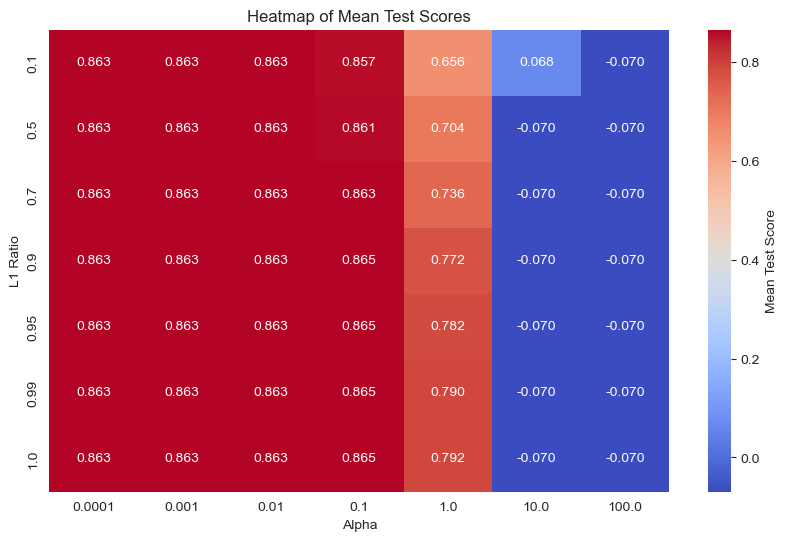

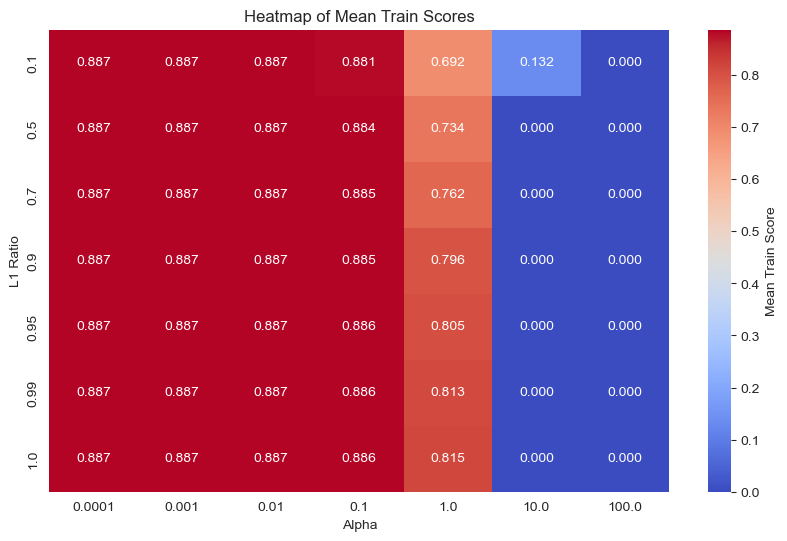

In [24]:
result_pd = result.to_pandas()

plt.figure(figsize=(10, 6))
pivot_test = result_pd.pivot(index="param_l1_ratio", columns="param_alpha", values="mean_test_score")
sns.heatmap(pivot_test, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Mean Test Score'})
plt.title("Heatmap of Mean Test Scores")
plt.xlabel("Alpha")
plt.ylabel("L1 Ratio")
plt.show()

plt.figure(figsize=(10, 6))
pivot_train = result_pd.pivot(index="param_l1_ratio", columns="param_alpha", values="mean_train_score")
sns.heatmap(pivot_train, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Mean Train Score'})
plt.title("Heatmap of Mean Train Scores")
plt.xlabel("Alpha")
plt.ylabel("L1 Ratio")
plt.show()

In [25]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [26]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [28]:
y_pred = grid_model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [29]:
MSE = mean_squared_error(y_test, y_pred)

In [30]:
r2 = r2_score(y_test, y_pred)

In [31]:
MAE = mean_absolute_error(y_test, y_pred)

In [32]:
RMSE = np.sqrt(MSE)

In [33]:
EVS = explained_variance_score(y_test, y_pred)

In [34]:
print(f"Mean Squared Error: {MSE} \nR2 Score: {r2} \nMean Absolute Error: {MAE} \nRoot Mean Squared Error: {RMSE} \nExplained Variance Score: {EVS}")

Mean Squared Error: 2.3873426420874737 
R2 Score: 0.9154389067914471 
Mean Absolute Error: 1.222908565262289 
Root Mean Squared Error: 1.5451027933724908 
Explained Variance Score: 0.9168954903216738


In [36]:
pl.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred,
    'MAE': MAE,
    'RMSE': RMSE,
    'EVS': EVS,
    'R2': r2,
    'Error': y_test - y_pred
})

y_test,y_pred,MAE,RMSE,EVS,R2,Error
f64,f64,f64,f64,f64,f64,f64
14.7,15.663689,1.222909,1.545103,0.916895,0.915439,-0.963689
19.8,19.464083,1.222909,1.545103,0.916895,0.915439,0.335917
11.9,11.533447,1.222909,1.545103,0.916895,0.915439,0.366553
16.7,16.903618,1.222909,1.545103,0.916895,0.915439,-0.203618
9.5,9.289864,1.222909,1.545103,0.916895,0.915439,0.210136
…,…,…,…,…,…,…
3.2,5.741527,1.222909,1.545103,0.916895,0.915439,-2.541527
25.4,23.025756,1.222909,1.545103,0.916895,0.915439,2.374244
10.8,12.626567,1.222909,1.545103,0.916895,0.915439,-1.826567
